## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [61]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

In [51]:
wine = datasets.load_wine()
wined = wine.data
x_train, x_test, y_train, y_test = train_test_split(wined, wine.target, test_size=0.2, random_state=3)

confusion matrix = [[12  3  0]
 [ 2 11  1]
 [ 0  1  6]]


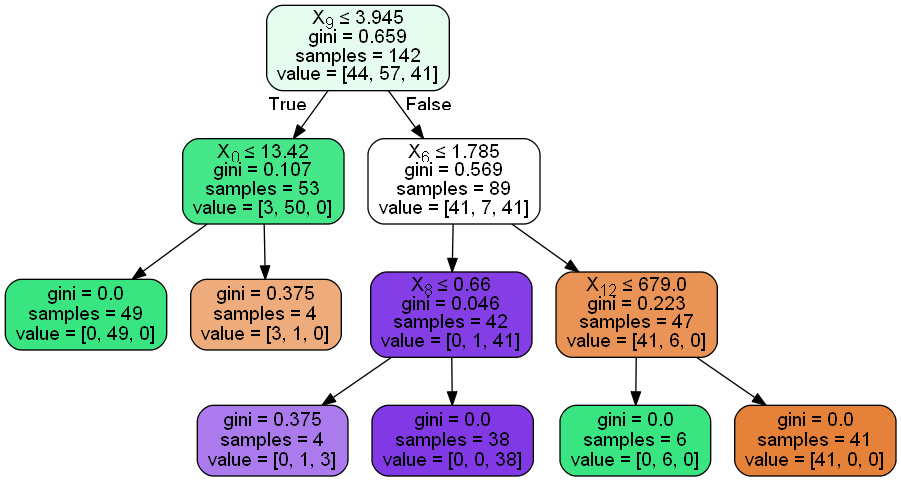

In [62]:
model = DecisionTreeClassifier(max_depth=3, min_samples_split=4, min_samples_leaf=4)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
confu = confusion_matrix(y_test, y_pred)
print('confusion matrix = {}'.format(confu))
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

confusion matrix = [[12  3  0]
 [ 1 12  1]
 [ 0  1  6]]


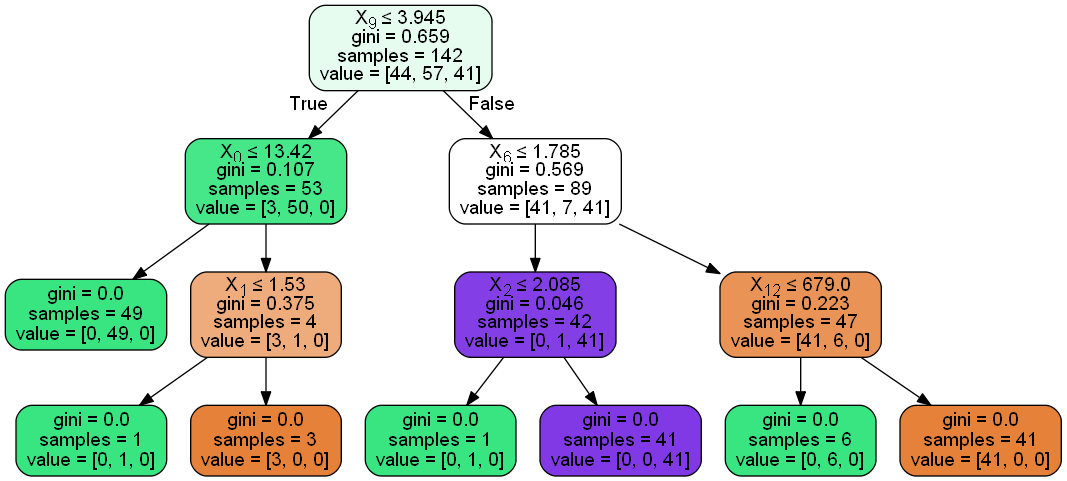

In [63]:
model = DecisionTreeClassifier(max_depth=50, min_samples_split=2, min_samples_leaf=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
confu = confusion_matrix(y_test, y_pred)
print('confusion matrix = {}'.format(confu))
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [54]:
model = DecisionTreeClassifier(max_depth=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
confu = confusion_matrix(y_test, y_pred)
print('confusion matrix = {}'.format(confu))

confusion matrix = [[12  3  0]
 [ 1 12  1]
 [ 0  1  6]]


MAE = 2.526346967724248


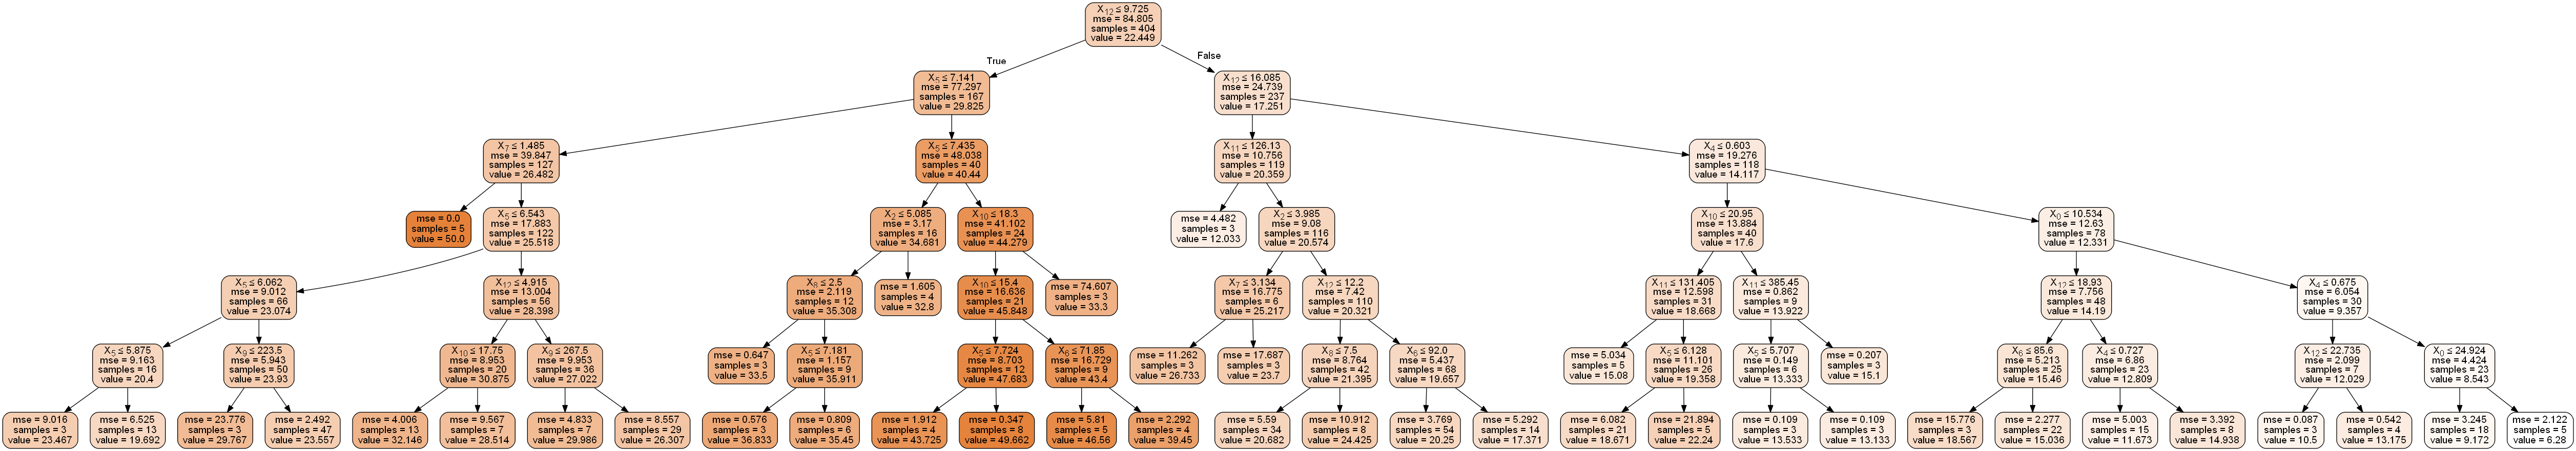

In [64]:
boston = datasets.load_boston()
bostond = boston.data
x_train, x_test, y_train, y_test = train_test_split(bostond, boston.target, test_size=0.2, random_state=3)
model = DecisionTreeRegressor(max_depth=6, min_samples_split=3, min_samples_leaf=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print('MAE = {}'.format(mae))
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

MAE = 2.6513492063492072


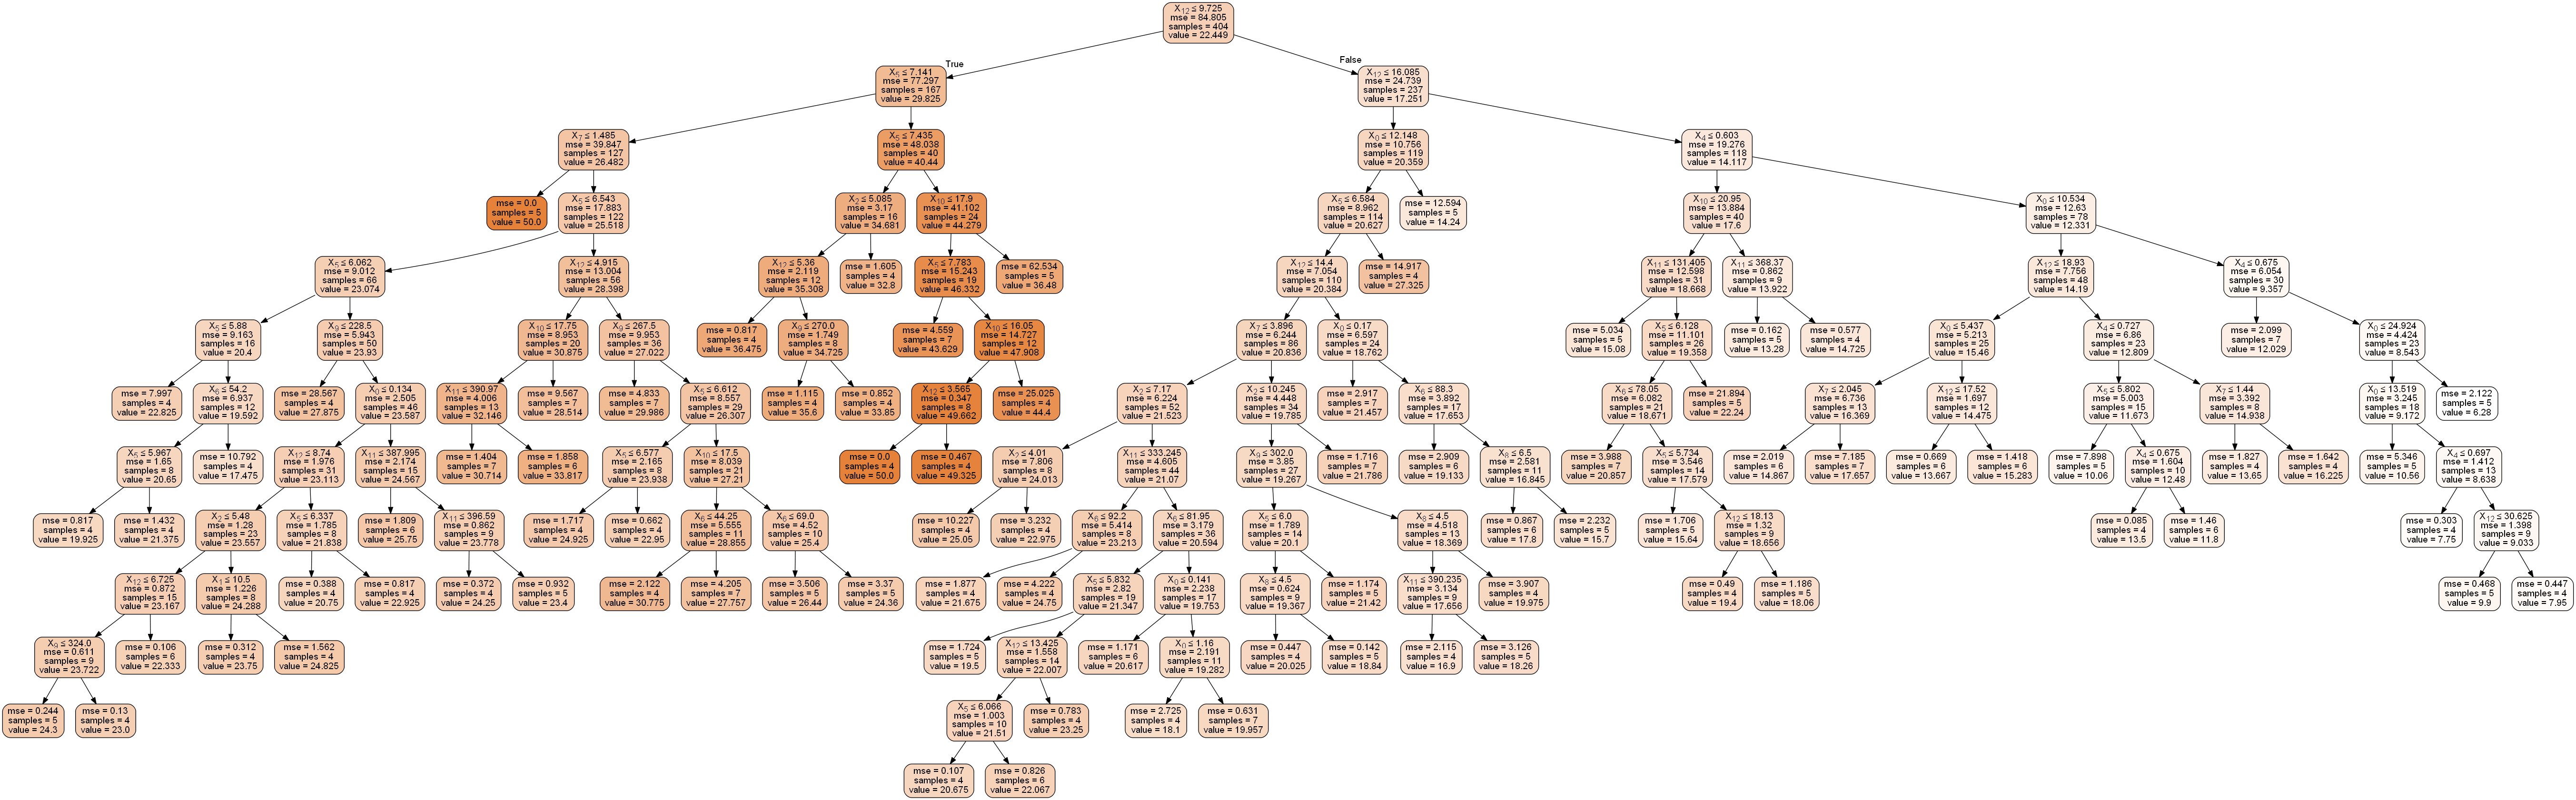

In [65]:
model = DecisionTreeRegressor(max_depth=20, min_samples_split=8, min_samples_leaf=4)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print('MAE = {}'.format(mae))
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
#樹太深對於testing data的表現會變差，這就是overfitting吧!